# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [3]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

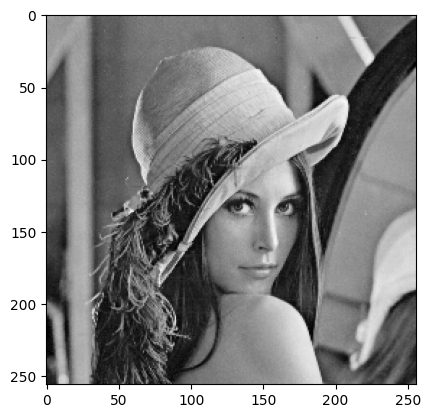

In [4]:
img=plt.imread('data/lena.png')
plt.imshow(img, 'grey')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [19]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):                             
        neighborhood_sum = 0
        counter = 0
        for q in numpy.ndindex(size, size):                         
            row = p[0] - n + q[0]
            col = p[1] - n + q[1]
            if 0 <= row < img.shape[0] and 0 <= col < img.shape[1]:
               neighborhood_sum += img[row, col]  
               counter += 1  
        if counter == size**2:
            result[p] = neighborhood_sum / (size**2)
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

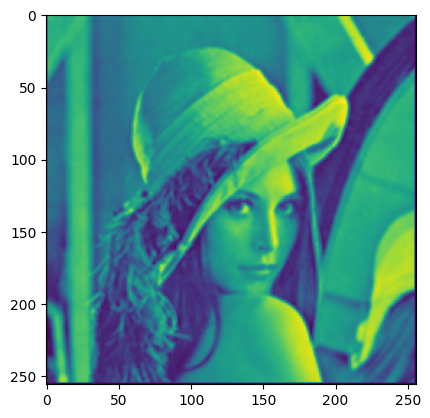

In [20]:
plt.imshow(meanfilter(img, 3))

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

In [21]:
assert numpy.allclose(meanfilter(img, 5), plt.imread('data/lena_meanfilter5.png'), atol=1/255)


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [39]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size -1) // 2
    for p in numpy.ndindex(img.shape):
        intensity_list = []
        counter = 0
        for q in numpy.ndindex(size, size):
            x = p[0] - n + q[0]
            y = p[1] - n + q[1]
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                intensity_list.append(img[x, y])
                counter += 1
        if counter == size ** 2:
            result[p] = numpy.median(intensity_list)
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

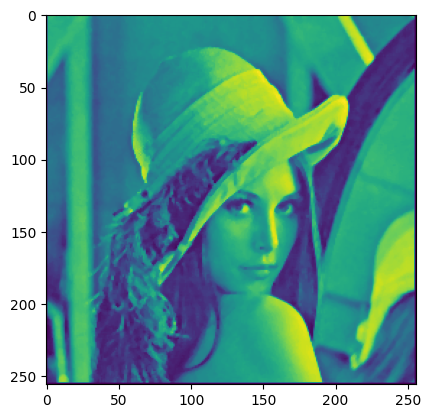

In [40]:
plt.imshow(medianfilter(img, 3))

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

In [42]:
assert numpy.allclose(medianfilter(img, 5), plt.imread('data/lena_medianfilter5.png'), atol=1/255)


---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [46]:
import scipy.ndimage


**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

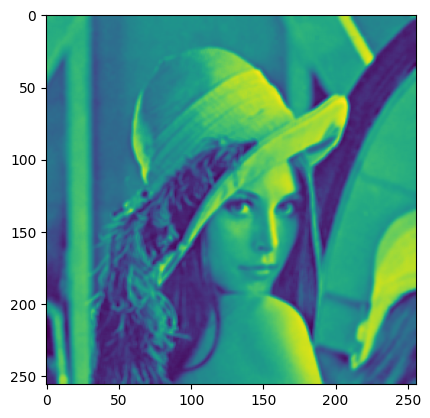

In [49]:
plt.imshow(scipy.ndimage.uniform_filter(img.copy(), 3))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

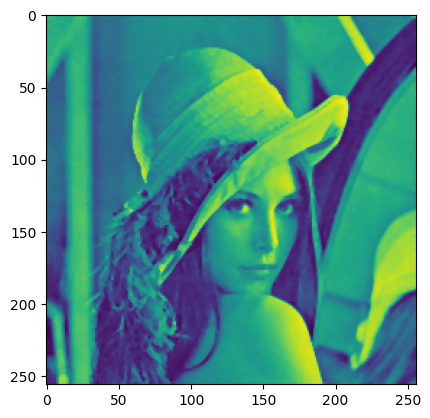

In [51]:
plt.imshow(scipy.ndimage.median_filter(img.copy(), 3))

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

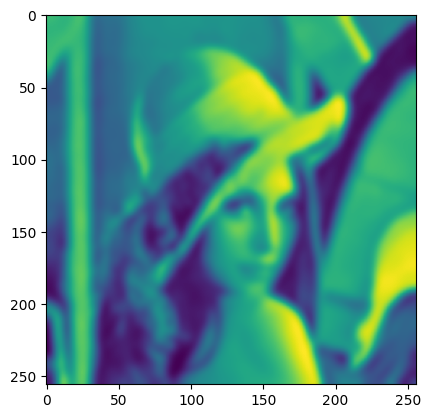

In [52]:
plt.imshow(scipy.ndimage.gaussian_filter(img.copy(), 3))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [70]:
def fastfilter(img, size):
    n = (size -1) // 2
    result = numpy.zeros(img.shape)
    for p in numpy.ndindex(img.shape):
        if n <= p[0] < img.shape[0]-n and n <= p[1] < img.shape[1]-n:
            result[p] = img[p[0]-n:p[0]+n+1, p[1]-n:p[1]+n+1].mean()
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

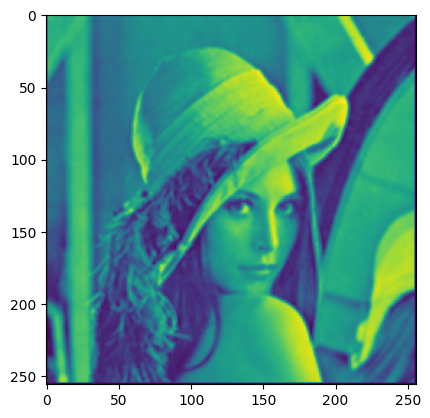

In [71]:
plt.imshow(fastfilter(img.copy(), 3))

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

In [72]:
assert numpy.allclose(meanfilter(img.copy(), 3), fastfilter(img.copy(), 3), atol = 1/255)

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [73]:
%timeit fastfilter(img.copy(), 9)
%timeit meanfilter(img.copy(), 9)

470 ms ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.69 s ± 1.25 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: